# **IMDBs Top 250 Movies**

#### Data Columns

* rank: The rank order of the movie in the list. (1 is Best , 250 is Worst of Top 250) 
* movie_name: Name of the movie 
* movie_name: Year of the movie 
* genre/0: Main Genre of the movie 
* genre/1: Additional Genre of the movie 
* genre/2: Additional Genre of the movie
* director_name: Director of the movie  
* rating: Imdb Rating Score of the movie
* actors_list/0: Leading Actor of the Movie
* actors_list/(n >= 1 && <= 17): Supporting Actors of the Movie in Hierarchical ordering 







## 1. Importing Libs, Dataset and Creating necessary dataframes 

### Importing all required libraries



In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



### Importing data , Creating and checking Dataframes 

In [2]:
imdbData = pd.read_csv("/kaggle/input/imdb-top-250-movies-by-datahut/imdb_data (1).csv")
imdbDataClone = pd.read_csv("/kaggle/input/imdb-top-250-movies-by-datahut/imdb_data (1).csv")

print("imdbData includes all-times Top 250 movies \n The shape of this dataset is: {} rows and {} columns".format(imdbData.shape[0], imdbData.shape[1]))

imdbData.head(3)

imdbData includes all-times Top 250 movies 
 The shape of this dataset is: 250 rows and 26 columns


,rank,movie_name,movie_year,genre/0,director_name,rating,actors_list/0,actors_list/1,actors_list/2,actors_list/3,...,actors_list/10,actors_list/11,actors_list/12,actors_list/13,actors_list/14,actors_list/15,actors_list/16,actors_list/17,genre/1,genre/2
0,1,The Shawshank Redemption,1994,Drama,Frank Darabont,9.3,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,...,Neil Giuntoli,Brian Libby,David Proval,Joseph Ragno,Jude Ciccolella,Paul McCrane,Renee Blaine,Scott Mann,NaN,NaN
1,2,The Godfather,1972,Crime,Francis Ford Coppola,9.2,Marlon Brando,Al Pacino,James Caan,Diane Keaton,...,Abe Vigoda,Talia Shire,Gianni Russo,John Cazale,Rudy Bond,Al Martino,Morgana King,Lenny Montana,Drama,NaN
2,3,The Dark Knight,2008,Action,Christopher Nolan,9.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,...,Chin Han,Nestor Carbonell,Eric Roberts,Ritchie Coster,Anthony Michael Hall,Keith Szarabajka,Colin McFarlane,Joshua Harto,Crime,Drama


In [3]:
imdbDataY2k = imdbData[imdbData['movie_year'] >= 2000].copy()

print("imdbDataY2k includes only the Top 250 movies after year 2000 \n The shape of this dataset is: {} rows and {} columns".format(imdbDataY2k.shape[0], imdbDataY2k.shape[1]))


imdbDataY2k.head(3)


imdbDataY2k includes only the Top 250 movies after year 2000 
 The shape of this dataset is: 97 rows and 26 columns


,rank,movie_name,movie_year,genre/0,director_name,rating,actors_list/0,actors_list/1,actors_list/2,actors_list/3,...,actors_list/10,actors_list/11,actors_list/12,actors_list/13,actors_list/14,actors_list/15,actors_list/16,actors_list/17,genre/1,genre/2
2,3,The Dark Knight,2008,Action,Christopher Nolan,9.0,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,...,Chin Han,Nestor Carbonell,Eric Roberts,Ritchie Coster,Anthony Michael Hall,Keith Szarabajka,Colin McFarlane,Joshua Harto,Crime,Drama
6,7,The Lord of the Rings: The Return of the King,2003,Action,Peter Jackson,9.0,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,...,Cate Blanchett,Billy Boyd,Sadwyn Brophy,Alistair Browning,Marton Csokas,Richard Edge,Jason Fitch,Bernard Hill,Adventure,Drama
8,9,The Lord of the Rings: The Fellowship of the Ring,2001,Action,Peter Jackson,8.8,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,...,Marton Csokas,Viggo Mortensen,Megan Edwards,Michael Elsworth,Cate Blanchett,Mark Ferguson,Ian Holm,Christopher Lee,Adventure,Drama


In [4]:
imdbDataOld = imdbData[imdbData['movie_year'] < 2000].copy()

print("imdbDataOld includes only the Top 250 movies older than year 2000 \n The shape of this dataset is: {} rows and {} columns".format(imdbDataOld.shape[0], imdbDataOld.shape[1]))

imdbDataOld.head(3)

imdbDataOld includes only the Top 250 movies older than year 2000 
 The shape of this dataset is: 153 rows and 26 columns


,rank,movie_name,movie_year,genre/0,director_name,rating,actors_list/0,actors_list/1,actors_list/2,actors_list/3,...,actors_list/10,actors_list/11,actors_list/12,actors_list/13,actors_list/14,actors_list/15,actors_list/16,actors_list/17,genre/1,genre/2
0,1,The Shawshank Redemption,1994,Drama,Frank Darabont,9.3,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,...,Neil Giuntoli,Brian Libby,David Proval,Joseph Ragno,Jude Ciccolella,Paul McCrane,Renee Blaine,Scott Mann,NaN,NaN
1,2,The Godfather,1972,Crime,Francis Ford Coppola,9.2,Marlon Brando,Al Pacino,James Caan,Diane Keaton,...,Abe Vigoda,Talia Shire,Gianni Russo,John Cazale,Rudy Bond,Al Martino,Morgana King,Lenny Montana,Drama,NaN
3,4,The Godfather: Part II,1974,Crime,Francis Ford Coppola,9.0,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,...,Gastone Moschin,Tom Rosqui,Bruno Kirby,Frank Sivero,Francesca De Sapio,Morgana King,Marianna Hill,Leopoldo Trieste,Drama,NaN


## 2.  Data Correlations


#### Correlation Between Rating and Leading Actor 

In [5]:

imdbDataClone['actors_list/0'] = pd.factorize(imdbDataClone['actors_list/0'])[0]

correlationRateLead = imdbData['rating'].corr(imdbDataClone['actors_list/0'])

print("Correlation between Rating of the Movie and Leading actors is:", correlationRateLead, '\nWhich is a strong negative correlation')


Correlation between Rating of the Movie and Leading actors is: -0.6352020402760906 
Which is a strong negative correlation


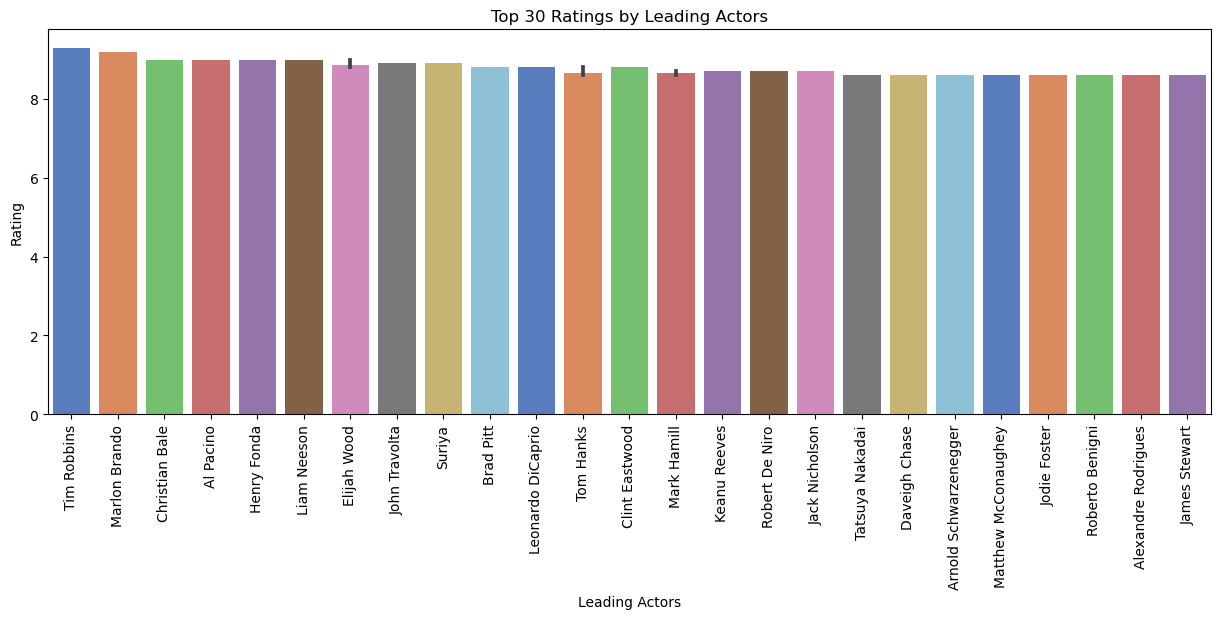

In [6]:


top_30_ratings = imdbData.sort_values(by='rating', ascending=False).head(30)

plt.figure(figsize=(15, 5))
sns.barplot(data=top_30_ratings, y='rating', x='actors_list/0', palette='muted')
plt.xlabel('Leading Actors')
plt.ylabel('Rating')
plt.title('Top 30 Ratings by Leading Actors')
plt.xticks(rotation=90)  

plt.show()


#### Correlation Between Rating and Movie Year 

In [7]:
correlationRateYear = imdbDataClone['rating'].corr(imdbDataClone['movie_year'])

print("Correlation between Rating of the Movie and the Year of the Movie been filmed:", correlationRateYear,'\n Which is a weak positive correlation')


Correlation between Rating of the Movie and the Year of the Movie been filmed: 0.03067681441932557 
 Which is a weak positive correlation


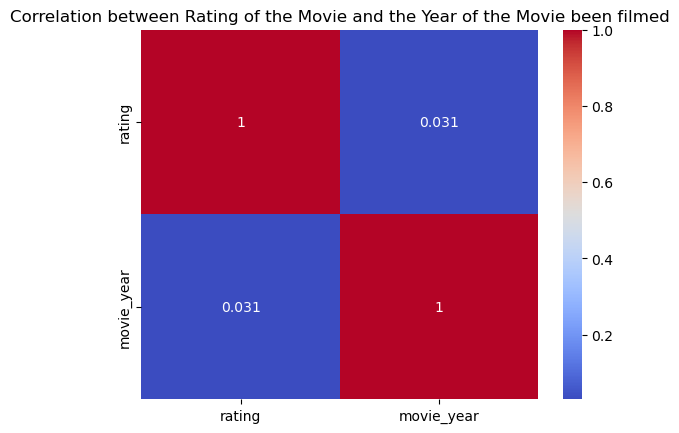

In [8]:
correlation_data = imdbDataClone[['rating', 'movie_year']]
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Rating of the Movie and the Year of the Movie been filmed")
plt.show()


#### Correlation Between Rating and Director

In [9]:
label_encoder = LabelEncoder()
imdbDataClone['director_label'] = label_encoder.fit_transform(imdbDataClone['director_name'])

correlationRateDire = imdbDataClone['director_label'].corr(imdbDataClone['rating'])

print("Correlation between Rating of the Movie and Leading actors is:", correlationRateDire, '\n Which is a weak negative correlation')


Correlation between Rating of the Movie and Leading actors is: -0.020265381817208692 
 Which is a weak negative correlation


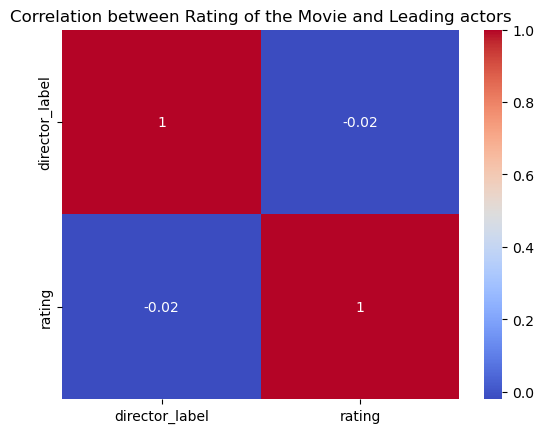

In [10]:
correlation_data = imdbDataClone[['director_label', 'rating']]
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title("Correlation between Rating of the Movie and Leading actors")
plt.show()


#### Correlation Between Leading Actor and Director

In [11]:
director_actors_df = imdbData[['director_name', 'actors_list/0']].copy()


director_actors_df.dropna(inplace=True)


director_actors_df['director_code'] = pd.factorize(director_actors_df['director_name'])[0]
director_actors_df['actor_code'] = pd.factorize(director_actors_df['actors_list/0'])[0]

correlationActDire = director_actors_df['director_code'].corr(director_actors_df['actor_code'])


print("Correlation between Heavy and Director is:", correlationActDire, '\n Which is a strong positive correlation')



Correlation between Heavy and Director is: 0.745905438921649 
 Which is a strong positive correlation


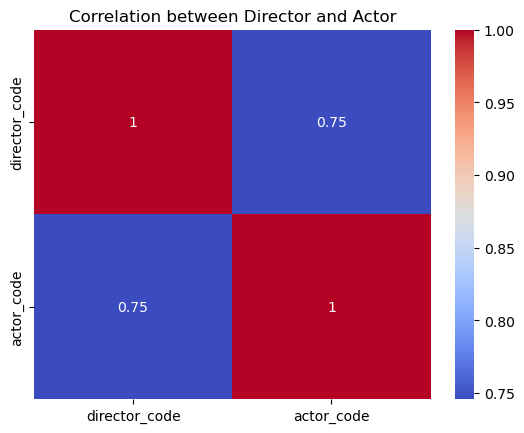

In [12]:
correlation_data = director_actors_df[['director_code', 'actor_code']]
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title("Correlation between Director and Actor")
plt.show()

## 2. Genre analysis 

### All Time Favorites

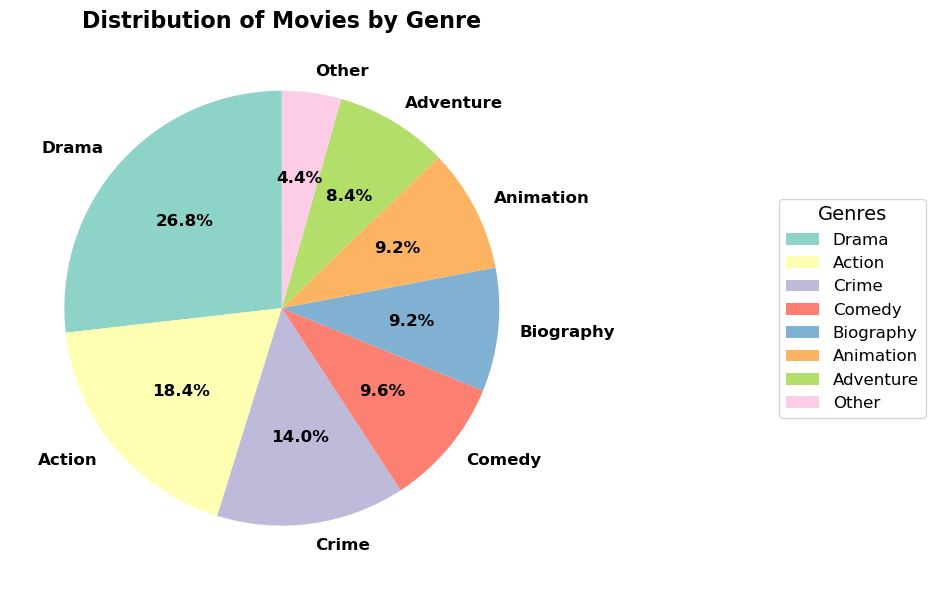

In [13]:
genre_counts = imdbData['genre/0'].value_counts()
threshold = len(imdbData) * 0.02
main_genres = genre_counts[genre_counts >= threshold].index
mask = ~imdbData['genre/0'].isin(main_genres)
other_count = genre_counts[~genre_counts.index.isin(main_genres)].sum()
genre_counts_filtered = genre_counts[genre_counts.index.isin(main_genres)]
genre_counts_filtered['Other'] = other_count

colors = plt.cm.Set3.colors
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(genre_counts_filtered, labels=genre_counts_filtered.index,
                                   autopct='%1.1f%%', startangle=90, colors=colors,
                                   textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set(aspect="equal")
ax.set_title('Distribution of Movies by Genre', fontsize=16, fontweight='bold')

for text, autotext in zip(texts, autotexts):
    text.set(fontsize=12, fontweight='bold', color='black')
    autotext.set(fontsize=12, fontweight='bold', color='black')

plt.legend(wedges, genre_counts_filtered.index, loc="center left", bbox_to_anchor=(1.4, 0.5),
           fontsize=12, title='Genres', title_fontsize=14)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.show()


### After 2000s Favorites

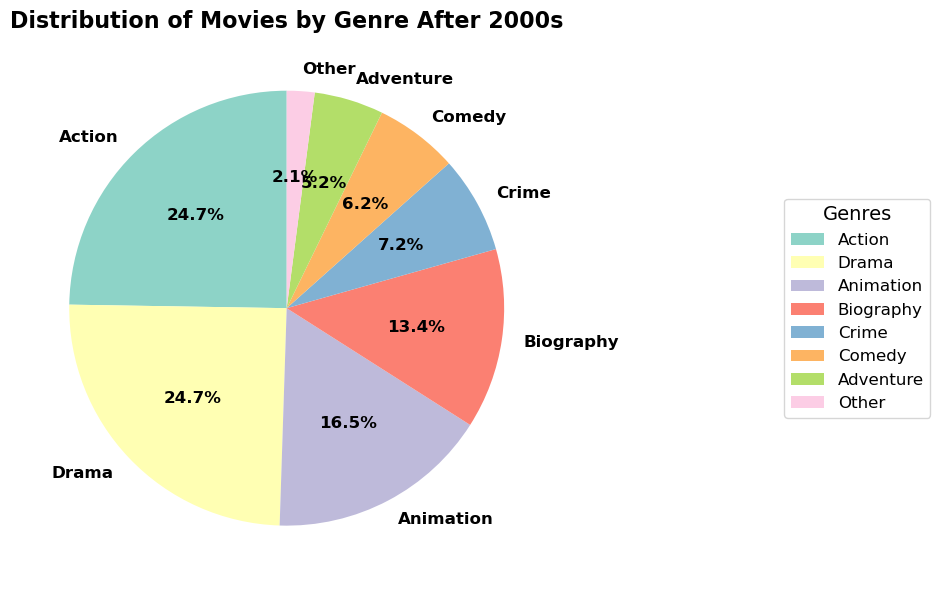

In [14]:
genre_counts = imdbDataY2k['genre/0'].value_counts()
threshold = len(imdbDataY2k) * 0.05
main_genres = genre_counts[genre_counts >= threshold].index
mask = ~imdbDataY2k['genre/0'].isin(main_genres)
other_count = genre_counts[~genre_counts.index.isin(main_genres)].sum()

genre_counts_filtered = genre_counts[genre_counts.index.isin(main_genres)]
genre_counts_filtered['Other'] = other_count

colors = plt.cm.Set3.colors
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(genre_counts_filtered, labels=genre_counts_filtered.index,
                                   autopct='%1.1f%%', startangle=90, colors=colors,
                                   textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set(aspect="equal")
ax.set_title('Distribution of Movies by Genre After 2000s', fontsize=16, fontweight='bold')

for text, autotext in zip(texts, autotexts):
    text.set(fontsize=12, fontweight='bold', color='black')
    autotext.set(fontsize=12, fontweight='bold', color='black')

plt.legend(wedges, genre_counts_filtered.index, loc="center left", bbox_to_anchor=(1.4, 0.5),
           fontsize=12, title='Genres', title_fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.show()


### Before 2000s Favorites

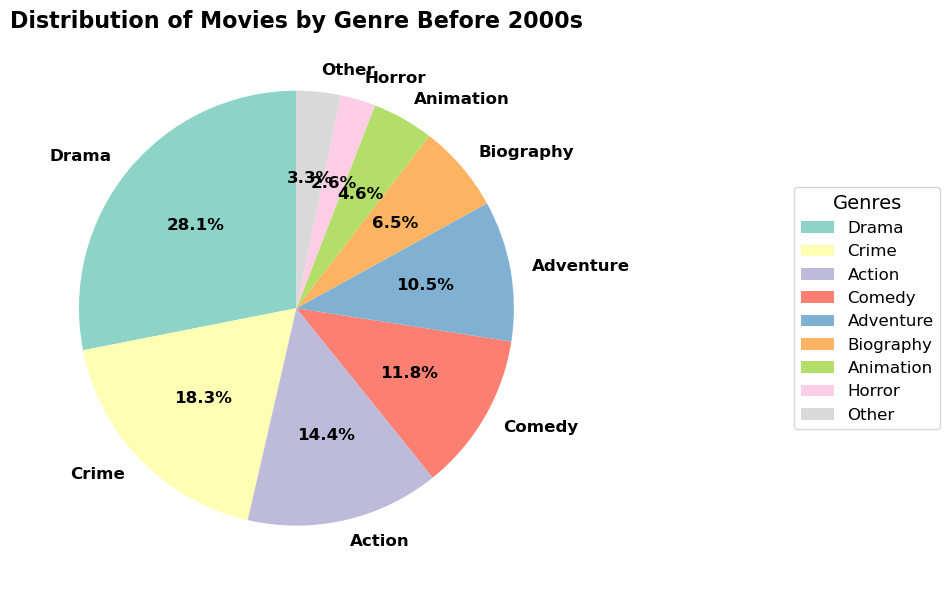

In [15]:
genre_counts = imdbDataOld['genre/0'].value_counts()
threshold = len(imdbDataOld) * 0.02
main_genres = genre_counts[genre_counts >= threshold].index
mask = ~imdbDataOld['genre/0'].isin(main_genres)
other_count = genre_counts[~genre_counts.index.isin(main_genres)].sum()

genre_counts_filtered = genre_counts[genre_counts.index.isin(main_genres)]
genre_counts_filtered['Other'] = other_count

colors = plt.cm.Set3.colors
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(genre_counts_filtered, labels=genre_counts_filtered.index,
                                   autopct='%1.1f%%', startangle=90, colors=colors,
                                   textprops={'fontsize': 12, 'fontweight': 'bold'})
ax.set(aspect="equal")
ax.set_title('Distribution of Movies by Genre Before 2000s', fontsize=16, fontweight='bold')

for text, autotext in zip(texts, autotexts):
    text.set(fontsize=12, fontweight='bold', color='black')
    autotext.set(fontsize=12, fontweight='bold', color='black')
plt.legend(wedges, genre_counts_filtered.index, loc="center left", bbox_to_anchor=(1.4, 0.5),
           fontsize=12, title='Genres', title_fontsize=14)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

plt.show()


### All Time Rate of Genre

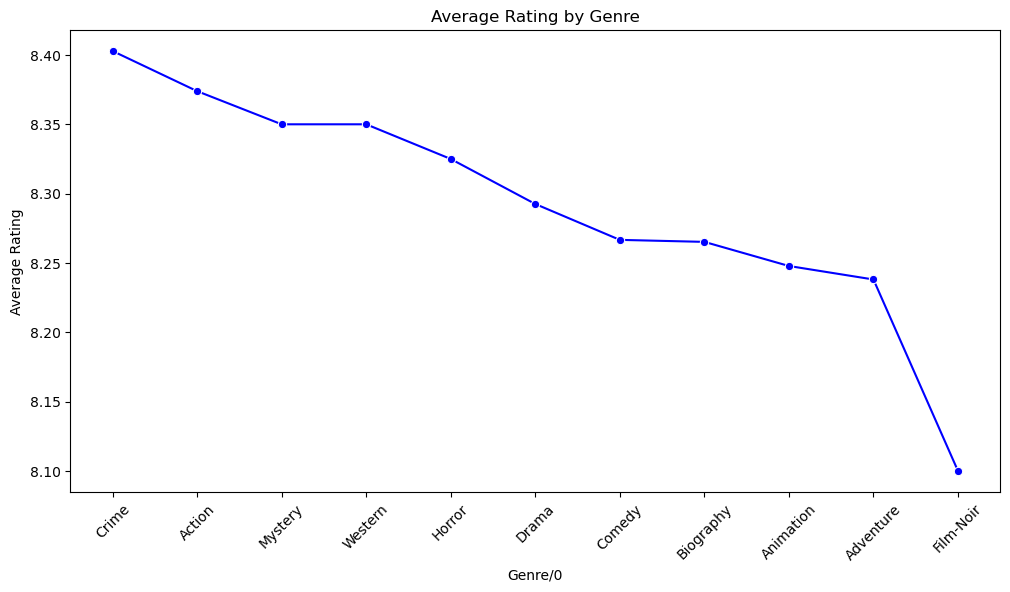

In [16]:
genre_ratings = imdbData.groupby('genre/0')['rating'].mean()
genre_ratings = genre_ratings.reset_index()
genre_ratings = genre_ratings.sort_values('rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_ratings, x='genre/0', y='rating', marker='o', color='b')
plt.xlabel('Genre/0')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)

plt.show()


### After 2000 Rate of Genre

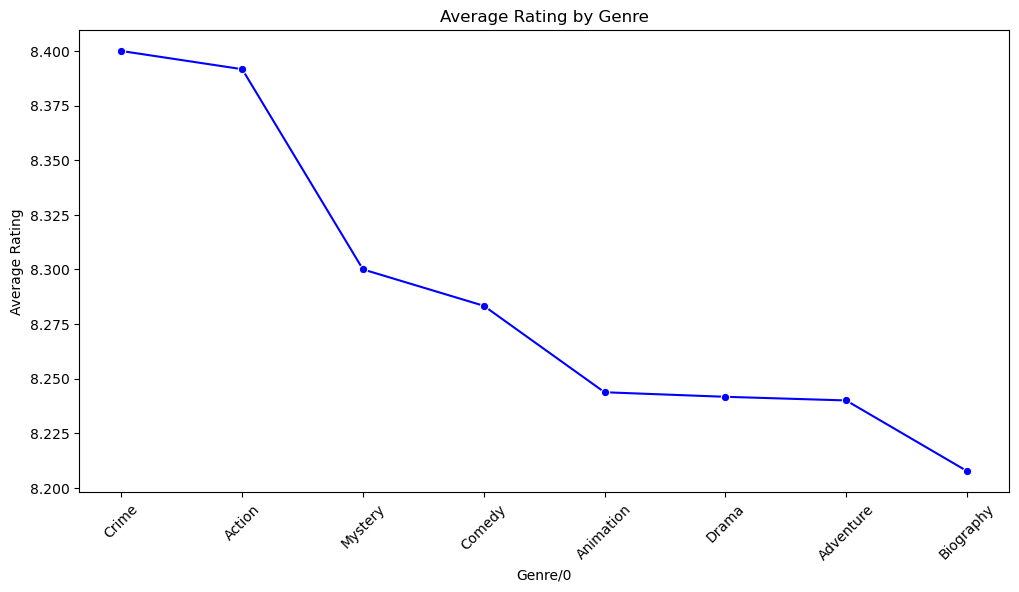

In [17]:
genre_ratings = imdbDataY2k.groupby('genre/0')['rating'].mean()
genre_ratings = genre_ratings.reset_index()
genre_ratings = genre_ratings.sort_values('rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_ratings, x='genre/0', y='rating', marker='o', color='b')
plt.xlabel('Genre/0')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)

plt.show()


### Before 2000 Rate of Genre

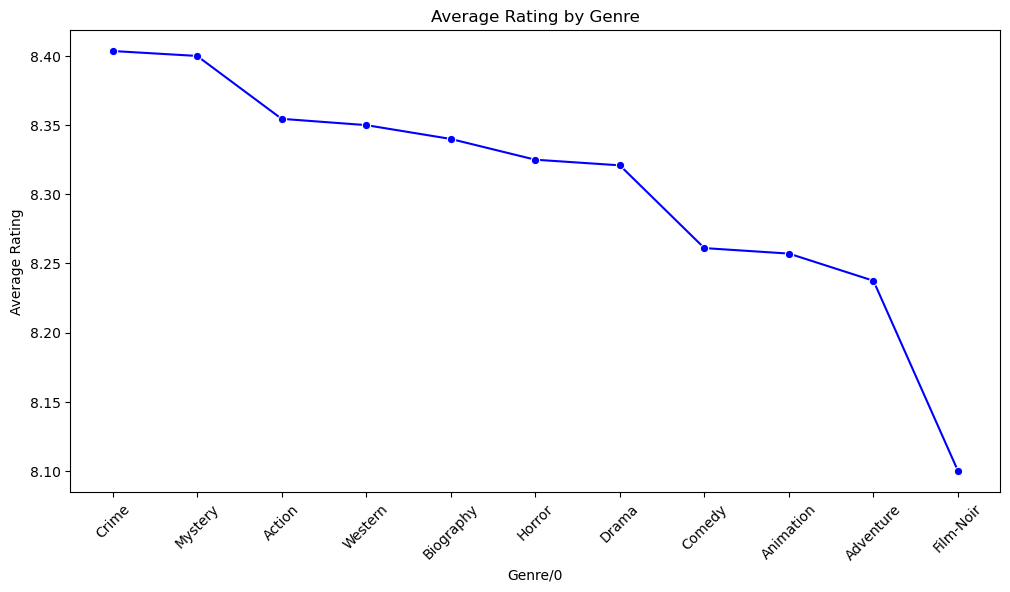

In [18]:
genre_ratings = imdbDataOld.groupby('genre/0')['rating'].mean()
genre_ratings = genre_ratings.reset_index()
genre_ratings = genre_ratings.sort_values('rating', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_ratings, x='genre/0', y='rating', marker='o', color='b')
plt.xlabel('Genre/0')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=45)

plt.show()


### Top 25 Movies And Their Genres All Time


In [19]:
top_movies = imdbData.nlargest(25, 'rating')[['movie_name', 'genre/0']]
top_movies

,movie_name,genre/0
0,The Shawshank Redemption,Drama
1,The Godfather,Crime
2,The Dark Knight,Action
3,The Godfather: Part II,Crime
4,12 Angry Men,Crime
5,Schindler's List,Biography
6,The Lord of the Rings: The Return of the King,Action
7,Pulp Fiction,Crime
247,Jai Bhim,Crime
8,The Lord of the Rings: The Fellowship of the Ring,Action


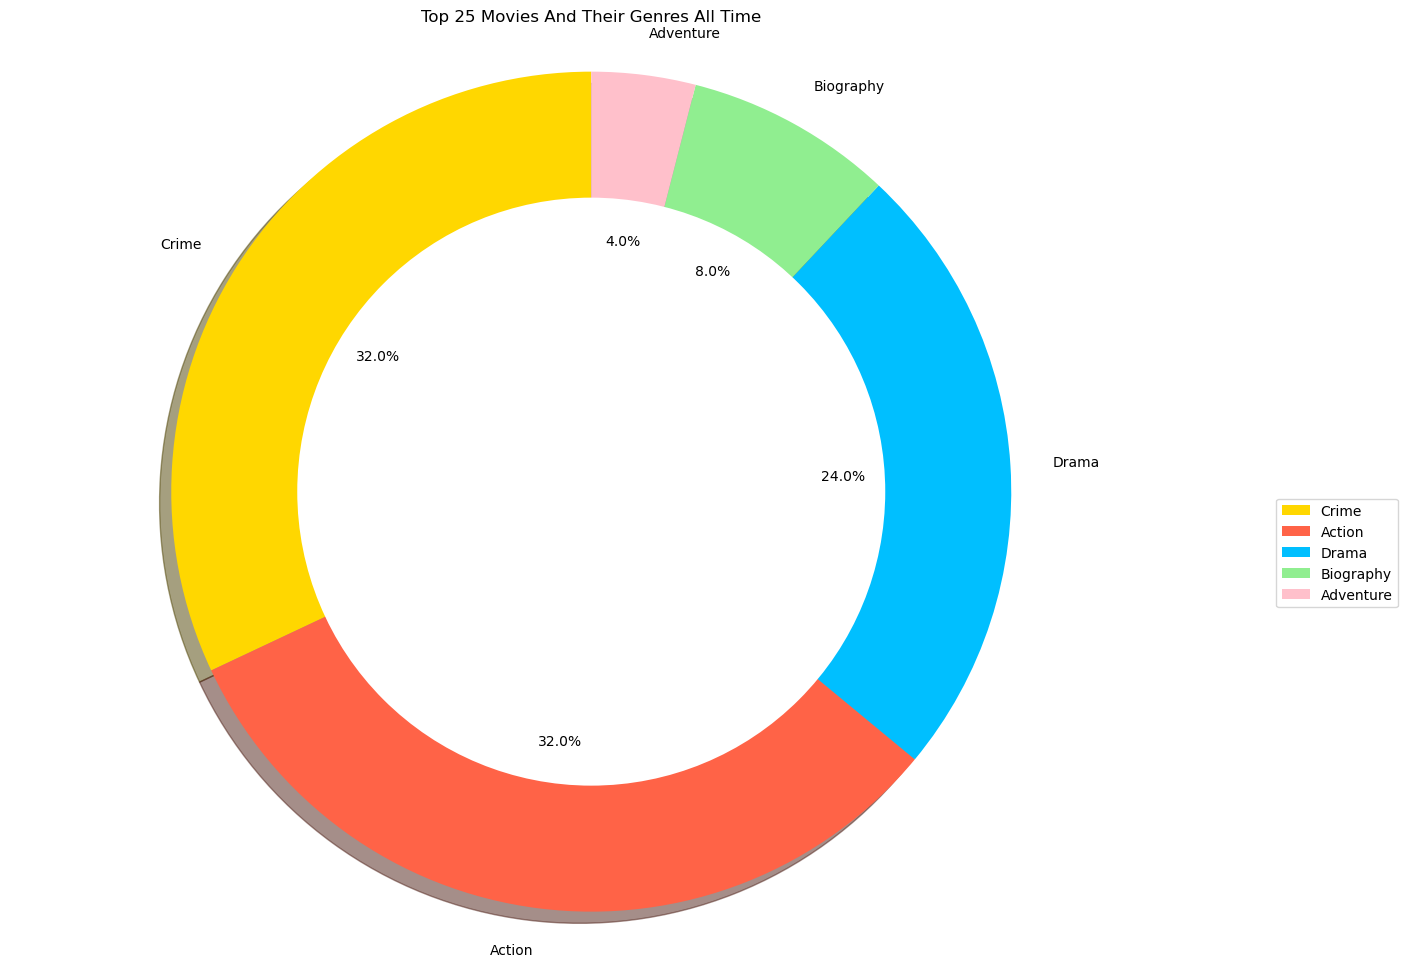

In [20]:
genre_counts = top_movies['genre/0'].value_counts()


colors = ['#FFD700', '#FF6347', '#00BFFF', '#90EE90', '#FFC0CB']
plt.figure(figsize=(15, 12))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Top 25 Movies And Their Genres All Time')
plt.legend(genre_counts.index, bbox_to_anchor=(1.2, 0.5), loc='upper right')

plt.axis('equal')

plt.show()


### Top 25 Movies And Their Genres After 2000s


In [21]:
top_moviesy2k = imdbDataY2k.nlargest(25, 'rating')[['movie_name', 'genre/0']]
top_moviesy2k

,movie_name,genre/0
2,The Dark Knight,Action
6,The Lord of the Rings: The Return of the King,Action
247,Jai Bhim,Crime
8,The Lord of the Rings: The Fellowship of the Ring,Action
12,Inception,Action
13,The Lord of the Rings: The Two Towers,Action
22,City of God,Crime
26,Interstellar,Adventure
30,Spirited Away,Animation
44,Top Gun: Maverick,Action


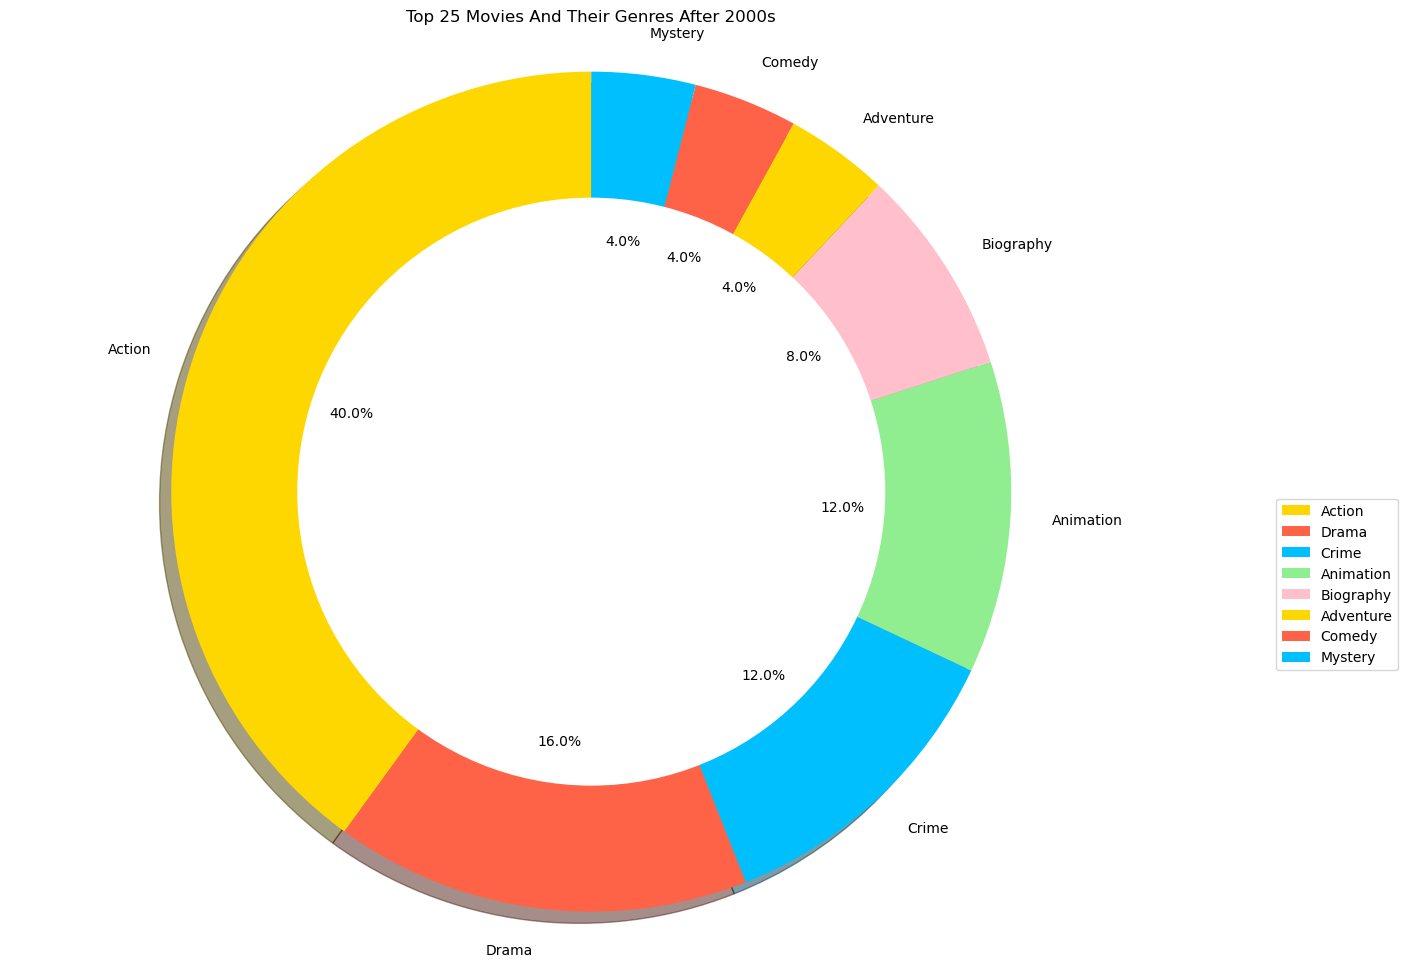

In [22]:
genre_counts = top_moviesy2k['genre/0'].value_counts()


colors = ['#FFD700', '#FF6347', '#00BFFF', '#90EE90', '#FFC0CB']
plt.figure(figsize=(15, 12))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Top 25 Movies And Their Genres After 2000s')
plt.legend(genre_counts.index, bbox_to_anchor=(1.2, 0.5), loc='upper right')

plt.axis('equal')

plt.show()


### Top 25 Movies And Their Genres Before 2000s


In [23]:
top_moviesold = imdbDataOld.nlargest(25, 'rating')[['movie_name', 'genre/0']]
top_moviesold

,movie_name,genre/0
0,The Shawshank Redemption,Drama
1,The Godfather,Crime
3,The Godfather: Part II,Crime
4,12 Angry Men,Crime
5,Schindler's List,Biography
7,Pulp Fiction,Crime
9,"Il Buono, Il Brutto, Il Cattivo",Adventure
10,Forrest Gump,Drama
11,Fight Club,Drama
14,Star Wars: Episode V - The Empire Strikes Back,Action


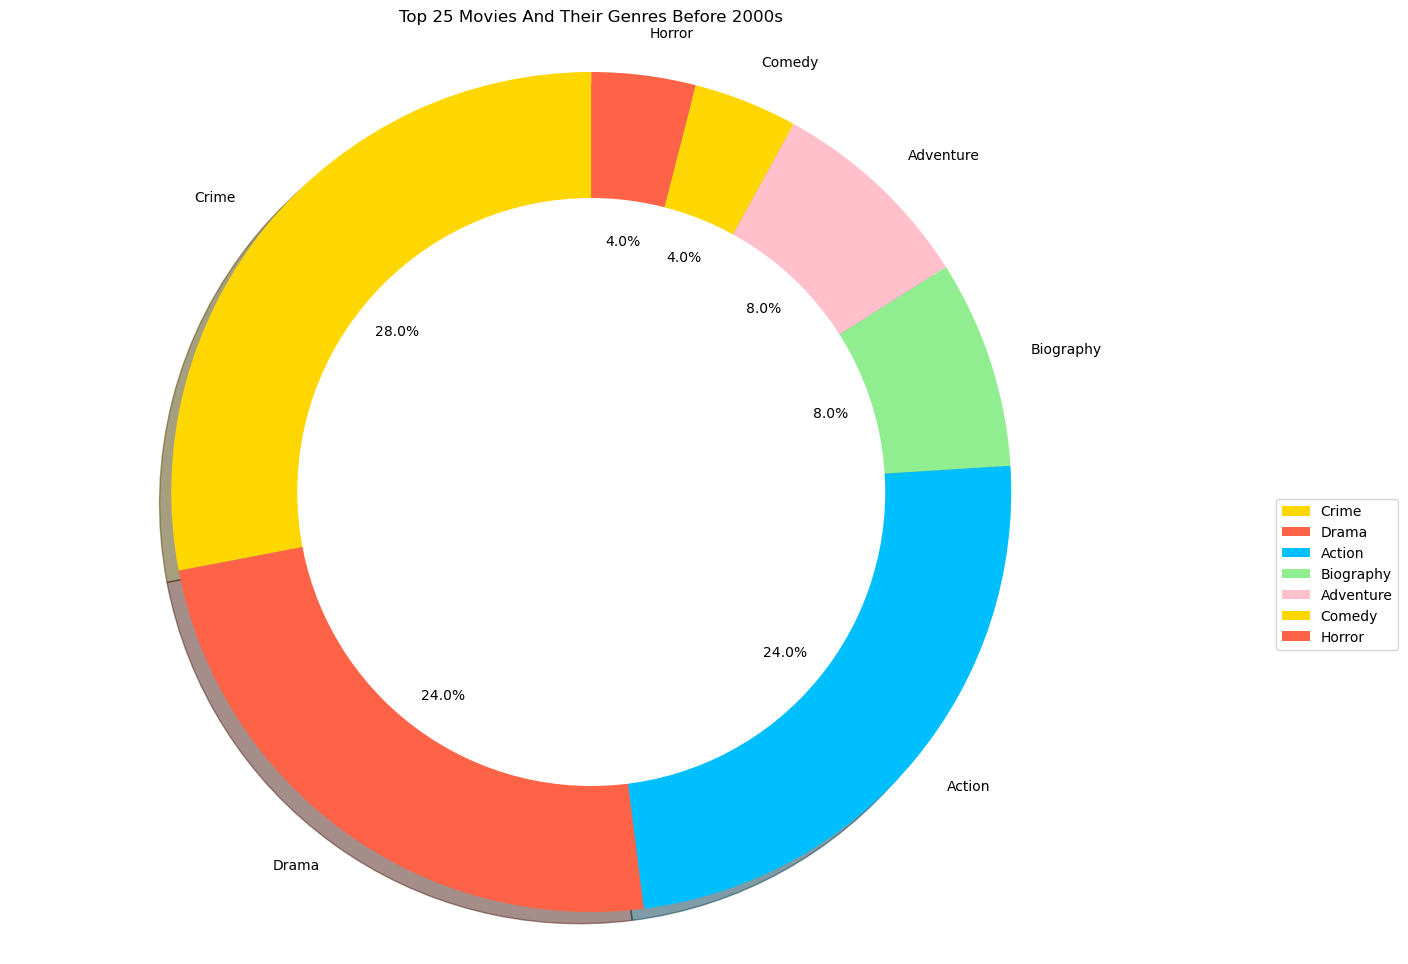

In [24]:
genre_counts = top_moviesold['genre/0'].value_counts()


colors = ['#FFD700', '#FF6347', '#00BFFF', '#90EE90', '#FFC0CB']
plt.figure(figsize=(15, 12))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Top 25 Movies And Their Genres Before 2000s')
plt.legend(genre_counts.index, bbox_to_anchor=(1.2, 0.5), loc='upper right')

plt.axis('equal')

plt.show()


### Even Older

In [25]:
imdbDataOlder = imdbData[imdbData['movie_year'] < 1960].copy()

In [26]:
top_moviesolder = imdbDataOlder.nlargest(25, 'rating')[['movie_name', 'genre/0']]
top_moviesolder

,movie_name,genre/0
4,12 Angry Men,Crime
19,Shichinin No Samurai,Action
20,It's a Wonderful Life,Drama
41,Casablanca,Drama
45,Modern Times,Comedy
49,Rear Window,Mystery
51,City Lights,Comedy
59,Sunset Blvd.,Drama
60,Paths of Glory,Drama
62,The Great Dictator,Comedy


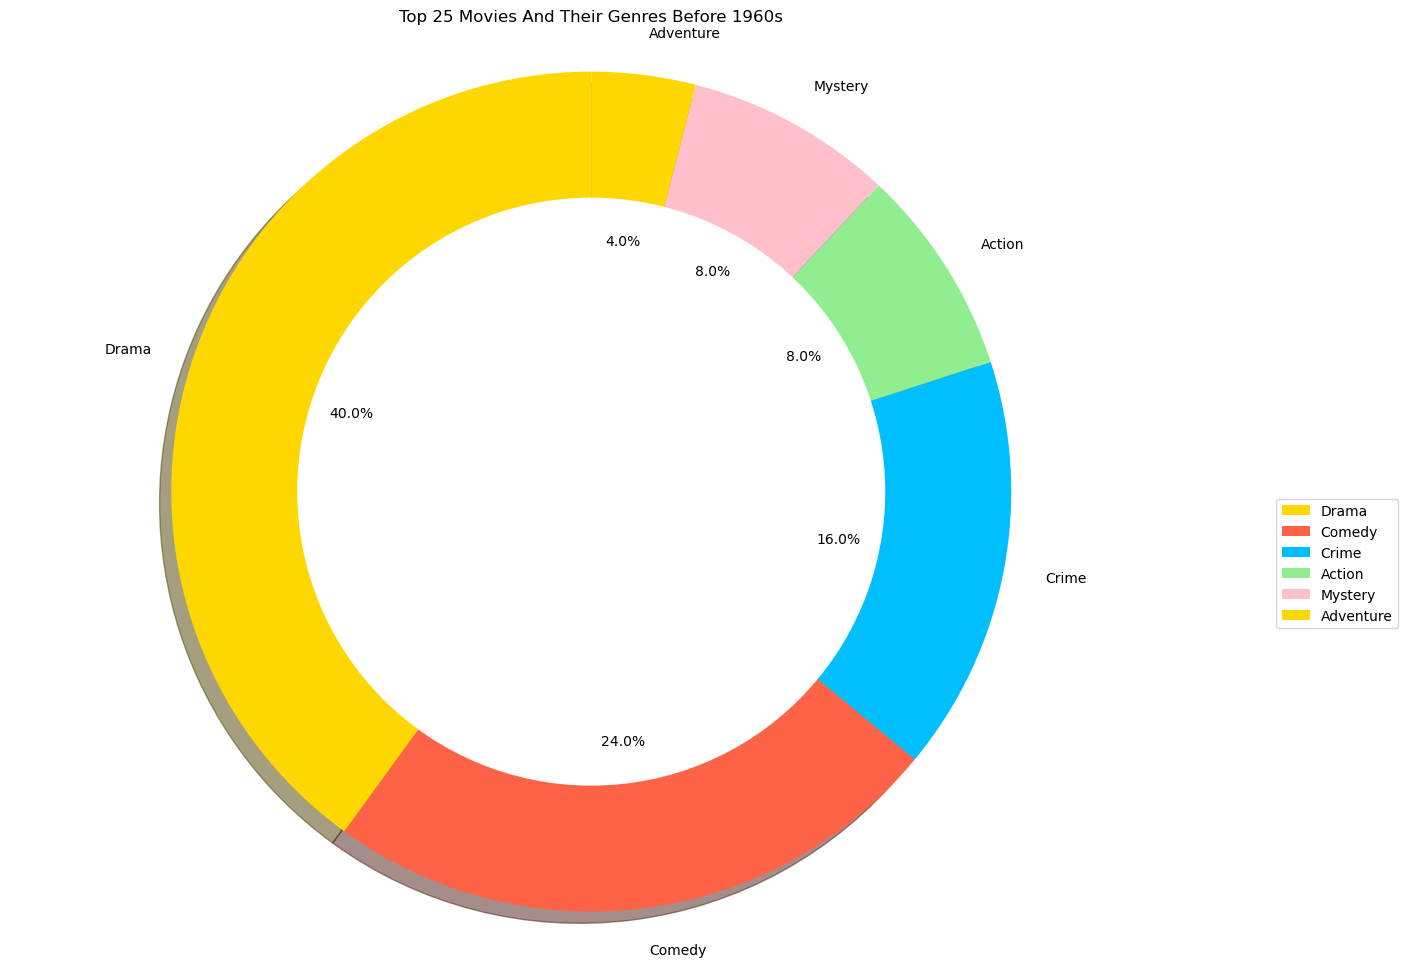

In [27]:
genre_counts = top_moviesolder['genre/0'].value_counts()


colors = ['#FFD700', '#FF6347', '#00BFFF', '#90EE90', '#FFC0CB']
plt.figure(figsize=(15, 12))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Top 25 Movies And Their Genres Before 1960s')
plt.legend(genre_counts.index, bbox_to_anchor=(1.2, 0.5), loc='upper right')

plt.axis('equal')

plt.show()
